In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing


### Data Source ###

___Training Data:___  The aircraft engine run-to-failure data.
  
___Test Data:___ The aircraft engine operating data without failure events recorded.

___Ground Truth Data:___ The true remaining cycles for each engine in the testing data.

### Data Columns

•	__id__: is the engine ID, ranging from 1 to 100  
•	__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (trining data only) 
•	__setting1__ to __setting3__: engine operational settings  
•	__s1__ to __s21__: sensors measurements  


In [2]:
#dataset column names:

col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23']


### Load Training Data:

In [3]:
#load training data

df_train_raw = pd.read_csv('PM_train.txt', sep = ' ', header=None)
df_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:

#assign column names

df_train_raw.columns = col_names
df_train_raw.head()
# df_train_raw.id.unique()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
df_train_raw.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [6]:
#drop extra space columnn

df_train_raw=df_train_raw.drop(columns=['s22','s23'])
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
# get some stat

df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


There are 100 engines. each engine has between 1 to 362 cycles (average of 108 cycles per engine). The last cycle for each engine represents the cycle when failure had happened.

In [8]:
# check the data types

df_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

All data columns are numeric.

No missing values. This is a clean dataset!

In [9]:
df_train_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

### Load Test Data:

In [10]:
#load test data

df_test_raw = pd.read_csv('PM_test.txt', sep = ' ', header=None)
df_test_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [11]:
# #drop extra space columnn
# df_test_raw.drop([26,27], axis=1, inplace='True')

#assign column names
df_test_raw.columns = col_names
df_test_raw.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [12]:
#drop extra space columnn

df_test_raw=df_test_raw.drop(columns=['s22','s23'])

In [13]:
# get some stat on test data

df_test_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,...,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


In [14]:
df_test_raw.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

Same as training data, there are 100 engines, each engine has between 1 to 303 cycles (average of 76 cycles per engine). But this time, failure cycle was not provided.  

Failure events for test data - remaining cycles before failure (TTF) - were provided in a separate truth file.

### Load Truth Data:

In [15]:
# Load the truth data - actual 'ttf' for test data

df_truth = pd.read_csv('PM_truth.txt', sep = ' ', header=None)
df_truth.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [16]:
#drop extra empty column in the truth data and rename remaining 'ttf'

# df_truth.drop([1], axis=1, inplace='True')
df_truth.columns = ['ttf','1']
df_truth=df_truth.drop(columns=['1'])
df_truth.head()

,ttf
0,112
1,98
2,69
3,82
4,91


In [17]:
#get some stat on truth data

df_truth.describe()

,ttf
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


To get meaningful test data, we need to merge the truth data (TTF) with last cycle for each engine in the test data. This will give us a test set of 100 engines with their TTF data. Will do that later when we create regression label for both training and test data. 

But now let us add some features to smooth the sensors reading: rolling average and rolling standard deviation.


### Feature Extraction:

Create helper function to create features based on smoothing the time series for sensors by adding rolling mean and rolling standard deviation

In [18]:

def add_features(df_in, rolling_win_size):
    
    """Add rolling average and rolling standard deviation for sensors readings using fixed rolling window size.
    
    Args:
            df_in (dataframe)     : The input dataframe to be proccessed (training or test) 
            rolling_win_size (int): The window size, number of cycles for applying the rolling function
        
    Reurns:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    
    """
    
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

    
        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

create helper function to add the regression and classification labels to the training data

In [19]:

def prepare_train_data (df_in):
    
    """Add regression and classification labels to the training data.

        Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
          
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0 , inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']

    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1 , inplace=True)
    return df_in
    

In [20]:
df_max_cycle = pd.DataFrame(df_train_raw.groupby('id')['cycle'].max())
df_max_cycle.reset_index(level=0 , inplace=True)
df_max_cycle.columns = ['id', 'last_cycle']
df_max_cycle.describe()

,id,last_cycle
count,100.000000,100.000000
mean,50.500000,206.310000
std,29.011492,46.342749
min,1.000000,128.000000
25%,25.750000,177.000000
50%,50.500000,199.000000
75%,75.250000,229.250000
max,100.000000,362.000000


In [21]:
df_max_cycle.head()

,id,last_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [22]:
df_max_cycle.describe()

,id,last_cycle
count,100.000000,100.000000
mean,50.500000,206.310000
std,29.011492,46.342749
min,1.000000,128.000000
25%,25.750000,177.000000
50%,50.500000,199.000000
75%,75.250000,229.250000
max,100.000000,362.000000


create helper function to add the regression and classification labels to the training data

In [23]:
# https://github.com/Samimust/predictive-maintenance
def prepare_test_data(df_test_in, df_truth_in):
    
    """Add regression and classification labels to the test data.

        Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
    

    
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']

    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    return df_test_in

With the help of these functions, let us prepare training and test data by adding features and labels

### Prepare the Training Data:

In [24]:
# add extracted features to training data

df_train_fx = add_features(df_train_raw, 5)
df_train_fx.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498


In [25]:
#add labels to training data using period of 30 cycles for classification

df_train = prepare_train_data (df_train_fx)
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187


In [94]:
df_train = df_train[df_train.ttf > 50]
df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.035355,5.041671,0.008697,0.0,0.000000e+00,0.0,0.0,0.042426,0.003253,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.026458,3.717450,0.007640,0.0,1.154701e+00,0.0,0.0,0.055076,0.044573,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.029439,3.050906,0.028117,0.0,1.000000e+00,0.0,0.0,0.076322,0.037977,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025884,2.651326,0.025953,0.0,1.095445e+00,0.0,0.0,0.073621,0.033498,187
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,0.023452,0.958697,0.025727,0.0,1.140175e+00,0.0,0.0,0.051186,0.031436,186
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.021679,0.643141,0.023476,0.0,1.140175e+00,0.0,0.0,0.086718,0.021634,185
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,0.021679,1.149274,0.022477,0.0,8.366600e-01,0.0,0.0,0.086487,0.034405,184
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.008944,3.205438,0.020740,0.0,8.366600e-01,0.0,0.0,0.077136,0.038939,183
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.014142,2.883881,0.020493,0.0,8.366600e-01,0.0,0.0,0.062849,0.058103,182


In [95]:
df_train.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
count,15531.000000,15531.000000,15531.000000,1.553100e+04,15531.0,1.553100e+04,15531.000000,15531.000000,15531.000000,1.553100e+04,...,15531.000000,15531.000000,15531.000000,15531.0,15531.000000,15531.0,15531.0,15531.000000,15531.000000,15531.000000
mean,51.837100,84.999936,-0.000015,7.468933e-07,100.0,5.186700e+02,642.506228,1588.448269,1405.418265,1.462000e+01,...,0.028148,2.962360,0.018774,0.0,0.877713,0.0,0.0,0.094386,0.056523,134.999936
std,29.337866,56.922992,0.002184,2.936428e-04,0.0,6.230239e-11,0.391409,4.866474,6.469010,2.982599e-12,...,0.010696,1.103957,0.007188,0.0,0.346260,0.0,0.0,0.035214,0.020880,56.922992
min,1.000000,1.000000,-0.008700,-6.000000e-04,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,51.000000
25%,26.000000,39.000000,-0.001500,-3.000000e-04,100.0,5.186700e+02,642.230000,1585.130000,1400.740000,1.462000e+01,...,0.020736,2.194083,0.013692,0.0,0.547723,0.0,0.0,0.069642,0.041782,89.000000
50%,53.000000,78.000000,0.000000,-0.000000e+00,100.0,5.186700e+02,642.510000,1588.460000,1405.430000,1.462000e+01,...,0.027749,2.896683,0.018277,0.0,0.836660,0.0,0.0,0.092574,0.055652,128.000000
75%,78.000000,121.000000,0.001500,3.000000e-04,100.0,5.186700e+02,642.770000,1591.750000,1410.020000,1.462000e+01,...,0.035071,3.665795,0.023390,0.0,1.140175,0.0,0.0,0.117047,0.070114,171.000000
max,100.000000,311.000000,0.007600,6.000000e-04,100.0,5.186700e+02,644.120000,1606.100000,1427.180000,1.462000e+01,...,0.084853,9.114606,0.065761,0.0,2.828427,0.0,0.0,0.325269,0.187313,361.000000


Rolling average, rolling standard deviation, regression labels have been added to the training data.  

Let us save the dataframe for later use in data exploration and modeling phases.

In [96]:
# save the training data to csv file for later use

df_train.to_csv('train.csv', index=False)

### Prepare the Test Data:

In [97]:
# add extracted features to test data

df_test_fx = add_features(df_test_raw, 5)
df_test_fx.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.311127,0.021213,9.948992,0.017607,0.0,0.707107,0.0,0.0,0.113137,0.012799
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.220681,0.017321,7.179807,0.032155,0.0,0.577350,0.0,0.0,0.113725,0.021642
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.337182,0.015000,5.890096,0.027781,0.0,0.957427,0.0,0.0,0.093095,0.020353
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.329742,0.014142,5.222300,0.024080,0.0,1.303840,0.0,0.0,0.080623,0.020672


In [98]:
df_test_fx['id'].value_counts()

49     303
93     244
91     234
62     232
12     217
81     213
76     205
34     203
100    198
35     198
31     196
13     195
10     192
52     189
68     187
24     186
20     184
89     177
58     176
43     172
84     172
29     171
64     168
8      166
17     165
53     164
82     162
77     162
57     160
7      160
      ... 
5       98
96      97
99      97
59      94
95      89
75      88
11      83
48      78
26      76
15      76
50      74
83      73
47      73
78      72
65      71
67      71
88      68
71      68
87      56
9       55
44      54
69      54
33      50
2       49
25      48
14      46
22      39
39      37
85      34
1       31
Name: id, Length: 100, dtype: int64

In [30]:
#add labels to test data using period of 30 cycles for classification
df_test = prepare_test_data(df_test_fx, df_truth)
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91


In [103]:
df_test = df_test[df_test.ttf > 50]
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91
5,6,105,0.0076,-0.0003,100.0,518.67,643.05,1586.94,1404.49,14.62,...,0.028810,4.295634,0.007488,0.0,0.447214,0.0,0.0,0.153395,0.071794,93
6,7,160,0.0016,-0.0001,100.0,518.67,642.10,1589.59,1413.57,14.62,...,0.032094,2.739885,0.016718,0.0,0.000000,0.0,0.0,0.098387,0.063694,91
7,8,166,0.0016,-0.0005,100.0,518.67,642.59,1591.91,1413.89,14.62,...,0.023022,2.017424,0.018301,0.0,0.447214,0.0,0.0,0.054314,0.036437,95
8,9,55,-0.0003,0.0004,100.0,518.67,642.27,1593.61,1410.27,14.62,...,0.038341,3.909556,0.013525,0.0,0.836660,0.0,0.0,0.015166,0.047928,111
9,10,192,-0.0018,0.0004,100.0,518.67,643.00,1589.50,1398.99,14.62,...,0.016733,3.062243,0.030489,0.0,0.836660,0.0,0.0,0.087920,0.055861,96


In [104]:
df_test.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
count,67.000000,67.000000,67.000000,67.000000,67.0,6.700000e+01,67.000000,67.000000,67.000000,6.700000e+01,...,67.000000,67.000000,67.000000,67.0,67.000000,67.0,67.0,67.000000,67.000000,67.000000
mean,48.820896,112.328358,0.000381,0.000055,100.0,5.186700e+02,642.558657,1588.826716,1406.537463,1.462000e+01,...,0.029634,3.162862,0.019713,0.0,0.877732,0.0,0.0,0.091103,0.057303,100.820896
std,31.430985,50.360936,0.002439,0.000311,0.0,8.018140e-13,0.338136,5.115771,6.652056,3.579527e-15,...,0.011337,1.118219,0.008429,0.0,0.308524,0.0,0.0,0.035801,0.021387,23.614919
min,1.000000,31.000000,-0.005900,-0.000500,100.0,5.186700e+02,641.750000,1576.930000,1389.330000,1.462000e+01,...,0.008367,0.622953,0.004579,0.0,0.000000,0.0,0.0,0.015166,0.018966,54.000000
25%,20.000000,72.500000,-0.001250,-0.000250,100.0,5.186700e+02,642.310000,1585.265000,1402.285000,1.462000e+01,...,0.021208,2.237950,0.013613,0.0,0.627415,0.0,0.0,0.067946,0.041339,86.000000
50%,50.000000,110.000000,0.000300,0.000100,100.0,5.186700e+02,642.580000,1588.940000,1406.320000,1.462000e+01,...,0.028810,3.279547,0.018032,0.0,0.836660,0.0,0.0,0.085557,0.055861,100.000000
75%,76.500000,147.500000,0.001700,0.000300,100.0,5.186700e+02,642.785000,1592.255000,1410.875000,1.462000e+01,...,0.037879,3.915027,0.024491,0.0,1.140175,0.0,0.0,0.111557,0.072474,116.500000
max,99.000000,244.000000,0.007600,0.000500,100.0,5.186700e+02,643.390000,1599.510000,1420.940000,1.462000e+01,...,0.062048,5.584839,0.049270,0.0,1.483240,0.0,0.0,0.187216,0.115700,145.000000


Rolling average, rolling standard deviation, regression labels labels have been added to the test data.  

Let us save the dataframe for later use in data exploration and modeling phases

In [105]:
# save the test data to csv file for later use

df_test.to_csv('test.csv', index=False)

# Load train data


In [106]:
df_tr_lbl = pd.read_csv('train.csv')
df_tr_lbl.head(10)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,0.023452,0.958697,0.025727,0.0,1.140175,0.0,0.0,0.051186,0.031436,186
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.021679,0.643141,0.023476,0.0,1.140175,0.0,0.0,0.086718,0.021634,185
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,0.021679,1.149274,0.022477,0.0,0.836660,0.0,0.0,0.086487,0.034405,184
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.008944,3.205438,0.020740,0.0,0.836660,0.0,0.0,0.077136,0.038939,183
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.014142,2.883881,0.020493,0.0,0.836660,0.0,0.0,0.062849,0.058103,182


In [107]:
#exclude enging id and cycle number from the input features:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

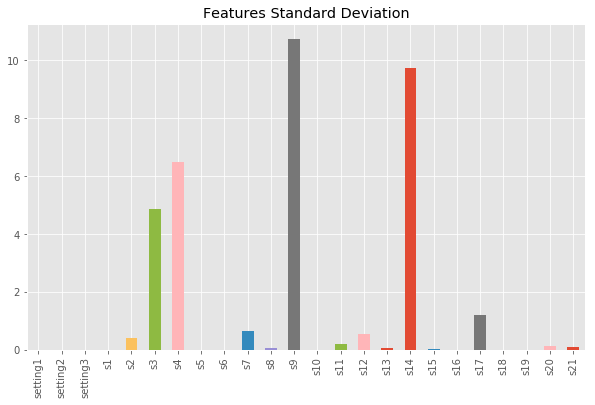

In [108]:
#plot and compare the standard deviation of input features:

df_tr_lbl[featurs].std().plot(kind='bar', figsize=(10,6), title="Features Standard Deviation")

In [109]:
df_tr_lbl[featurs].std().sort_values(ascending=False)

s9          1.073215e+01
s14         9.730335e+00
s4          6.469010e+00
s3          4.866474e+00
s17         1.200844e+00
s7          6.547413e-01
s12         5.332372e-01
s2          3.914090e-01
s11         1.883744e-01
s20         1.383048e-01
s21         8.258368e-02
s13         5.638857e-02
s8          5.565213e-02
s15         2.816832e-02
setting1    2.183608e-03
s6          1.591775e-03
setting2    2.936428e-04
s1          6.230239e-11
s5          2.982599e-12
s10         3.803747e-13
s16         1.171670e-14
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

In [110]:
# get ordered list features correlation with regression label ttf
df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         3.971567e-01
s7          3.820645e-01
s21         3.591492e-01
s20         3.528778e-01
setting2    7.482349e-03
setting1    1.200765e-03
s10        -8.420652e-16
s16        -8.420652e-16
s5         -8.420652e-16
s6         -1.028534e-01
s14        -1.670355e-01
s9         -2.496193e-01
s3         -3.087486e-01
s13        -3.105512e-01
s8         -3.107282e-01
s2         -3.292454e-01
s17        -3.292988e-01
s15        -3.619565e-01
s4         -4.042528e-01
s11        -4.276088e-01
setting3             NaN
s1                   NaN
s18                  NaN
s19                  NaN
dtype: float64

In [111]:
df_tr_lbl[df_tr_lbl.s5==14.62]["s5"].value_counts()

14.62    15531
Name: s5, dtype: int64

In [112]:
df_tr_lbl["s5"].std()

2.982599155733025e-12

In [113]:
# list of features having low or no correlation with regression label ttf and very low or no variance
# These features will be target for removal in feature selection
low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,15531.0,1.553100e+04,1.553100e+04,15531.0,15531.0,1.553100e+04,1.553100e+04,1.553100e+04,15531.000000
mean,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,7.468933e-07,-0.000015
std,0.0,6.230239e-11,3.803747e-13,0.0,0.0,1.171670e-14,2.982599e-12,2.936428e-04,0.002184
min,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-6.000000e-04,-0.008700
25%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-3.000000e-04,-0.001500
50%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000000e+00,0.000000
75%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,3.000000e-04,0.001500
max,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,6.000000e-04,0.007600


In [114]:
# list of features having high correlation with regression label ttf

correl_featurs = ['s12', 's7', 's21', 's20','s6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_tr_lbl[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000
mean,521.698884,553.701727,23.329155,38.881635,21.609740,8140.002152,9059.845694,2388.073078,2388.073805,1588.448269,392.667568,642.506228,8.428241,1405.418265,47.434848
std,0.533237,0.654741,0.082584,0.138305,0.001592,9.730335,10.732147,0.056389,0.055652,4.866474,1.200844,0.391409,0.028168,6.469010,0.188374
min,519.820000,551.510000,22.988400,38.400000,21.600000,8111.060000,9029.070000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,521.320000,553.240000,23.272200,38.790000,21.610000,8133.765000,9052.800000,2388.030000,2388.030000,1585.130000,392.000000,642.230000,8.408800,1400.740000,47.300000
50%,521.700000,553.700000,23.329300,38.880000,21.610000,8139.970000,9059.490000,2388.070000,2388.070000,1588.460000,393.000000,642.510000,8.428100,1405.430000,47.440000
75%,522.090000,554.170000,23.386700,38.980000,21.610000,8145.820000,9066.050000,2388.110000,2388.110000,1591.750000,393.000000,642.770000,8.447700,1410.020000,47.570000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8186.200000,9116.100000,2388.260000,2388.280000,1606.100000,397.000000,644.120000,8.533900,1427.180000,48.060000


['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11'] could be target for feature selection during modeling since their correlation with TTF is higher than other features.  

Let us disply this correlation in heatmap

In [115]:
# add the regression label 'ttf' to the list of high corr features 

correl_featurs_lbl = correl_featurs + ['ttf']


In [116]:
df_tr_lbl[correl_featurs_lbl].corr()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11,ttf
s12,1.000000,0.650499,0.565214,0.564744,-0.161952,0.273645,0.139091,-0.674177,-0.669994,-0.471725,-0.499310,-0.525140,-0.575872,-0.653018,-0.706700,0.397157
s7,0.650499,1.000000,0.536080,0.540475,-0.160968,0.242948,0.116698,-0.639933,-0.641523,-0.449470,-0.487898,-0.491755,-0.546815,-0.614067,-0.663493,0.382064
s21,0.565214,0.536080,1.000000,0.469918,-0.130587,0.167999,0.052661,-0.544980,-0.543647,-0.397681,-0.422058,-0.442856,-0.478617,-0.535826,-0.581519,0.359149
s20,0.564744,0.540475,0.469918,1.000000,-0.136767,0.163680,0.052522,-0.541895,-0.540863,-0.384318,-0.419783,-0.433669,-0.488974,-0.549082,-0.586555,0.352878
s6,-0.161952,-0.160968,-0.130587,-0.136767,1.000000,-0.063841,-0.032232,0.166100,0.156332,0.100252,0.121171,0.122653,0.148845,0.152624,0.170677,-0.102853
s14,0.273645,0.242948,0.167999,0.163680,-0.063841,1.000000,0.868410,-0.470292,-0.470157,-0.105449,-0.111293,-0.160102,-0.164134,-0.201611,-0.242807,-0.167036
s9,0.139091,0.116698,0.052661,0.052522,-0.032232,0.868410,1.000000,-0.340733,-0.340682,-0.013960,-0.009853,-0.054323,-0.048672,-0.072365,-0.104383,-0.249619
s13,-0.674177,-0.639933,-0.544980,-0.541895,0.166100,-0.470292,-0.340733,1.000000,0.715795,0.439259,0.473557,0.508546,0.550761,0.622486,0.680371,-0.310551
s8,-0.669994,-0.641523,-0.543647,-0.540863,0.156332,-0.470157,-0.340682,0.715795,1.000000,0.438737,0.473351,0.505293,0.553377,0.626037,0.679155,-0.310728
s3,-0.471725,-0.449470,-0.397681,-0.384318,0.100252,-0.105449,-0.013960,0.439259,0.438737,1.000000,0.353418,0.360311,0.400026,0.453613,0.477352,-0.308749


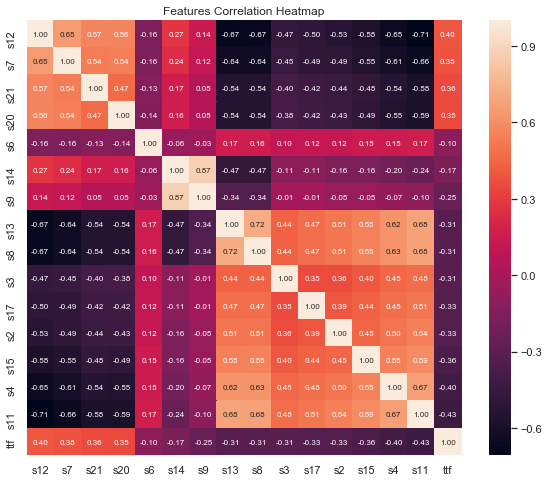

In [117]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

In [118]:
from pandas.plotting import scatter_matrix
sns.reset_orig()

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1EE9FC358>,
      dtype=object)

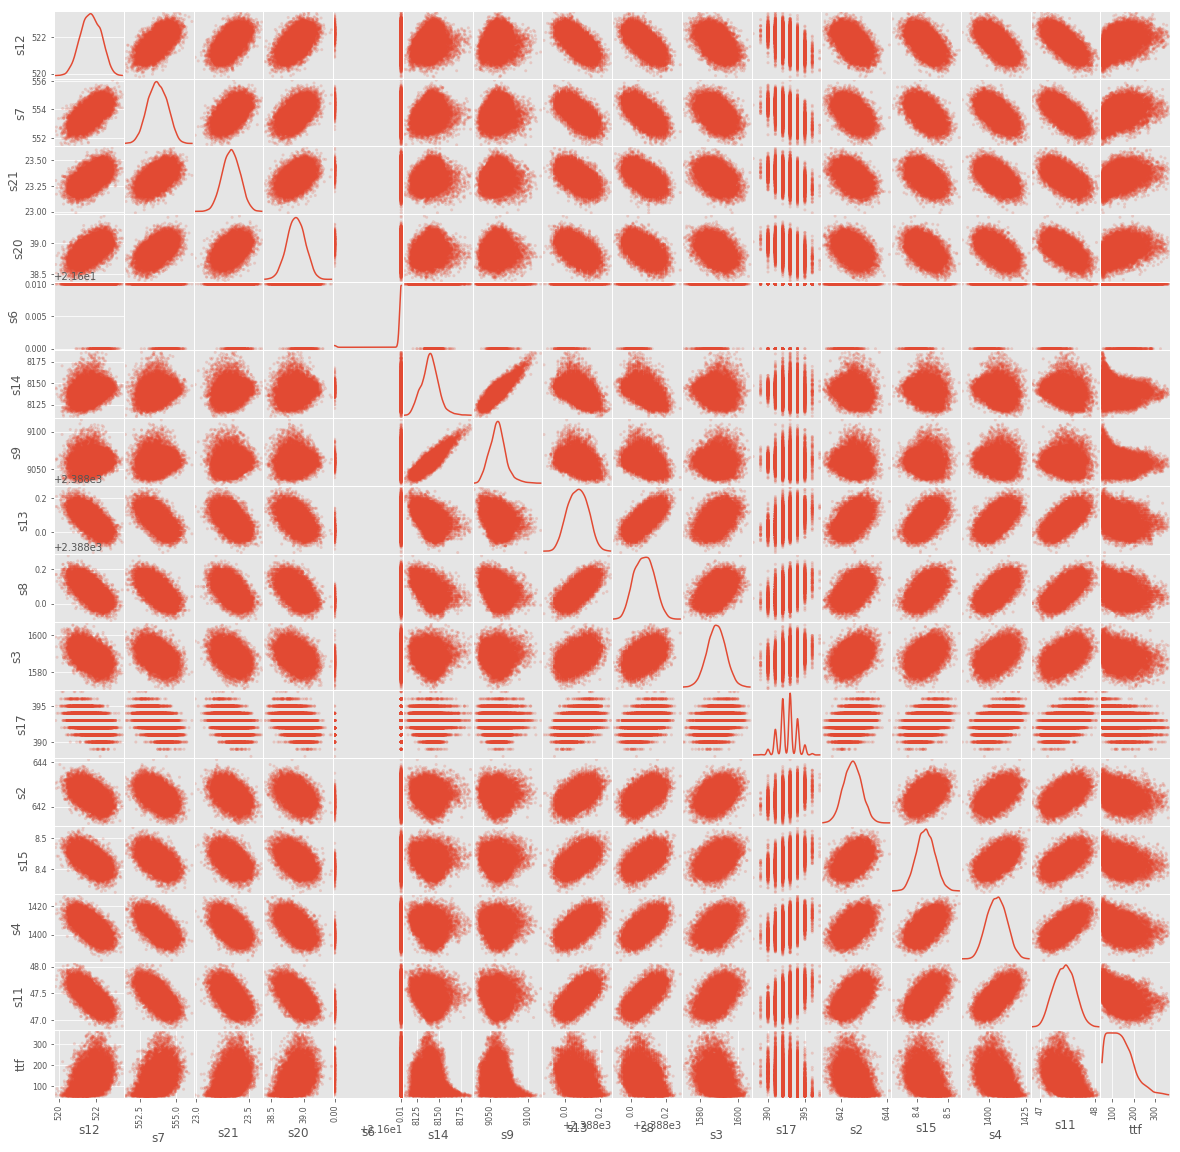

In [119]:
#create scatter matrix to disply relatiohships and distribution among features and regression label

scatter_matrix(df_tr_lbl[correl_featurs_lbl], alpha=0.2, figsize=(20, 20), diagonal='kde')


Let us create a helper function to ease exploration of each feature invidually:

In [120]:
def explore_col(s,e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

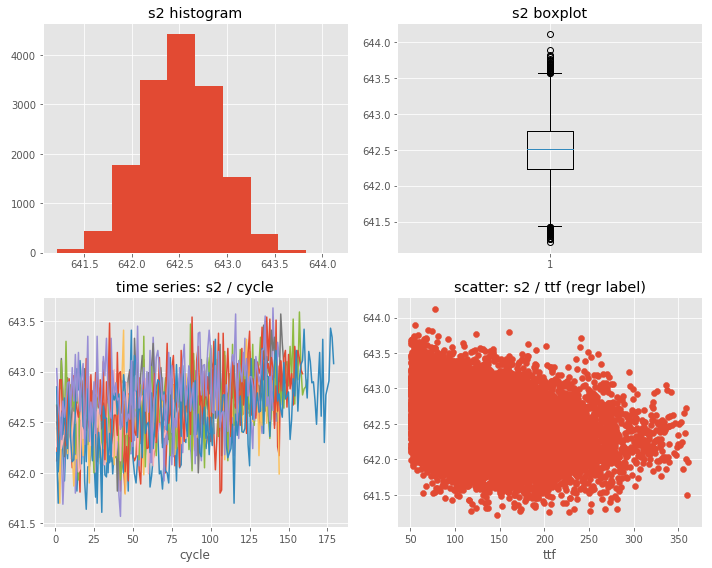

In [121]:
explore_col("s2",10)

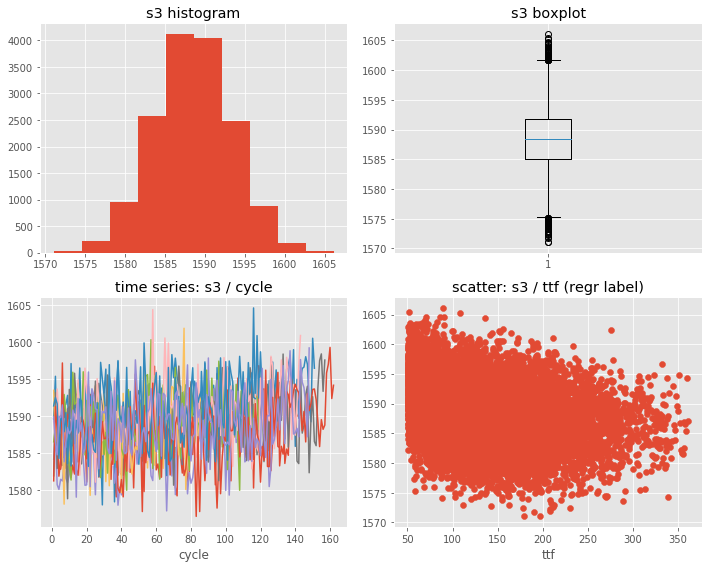

In [122]:
explore_col("s3",10)

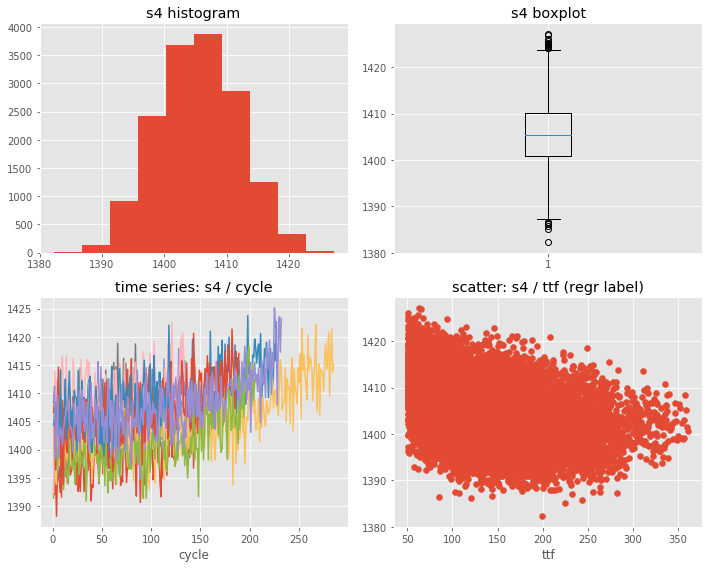

In [123]:
explore_col("s4",10)

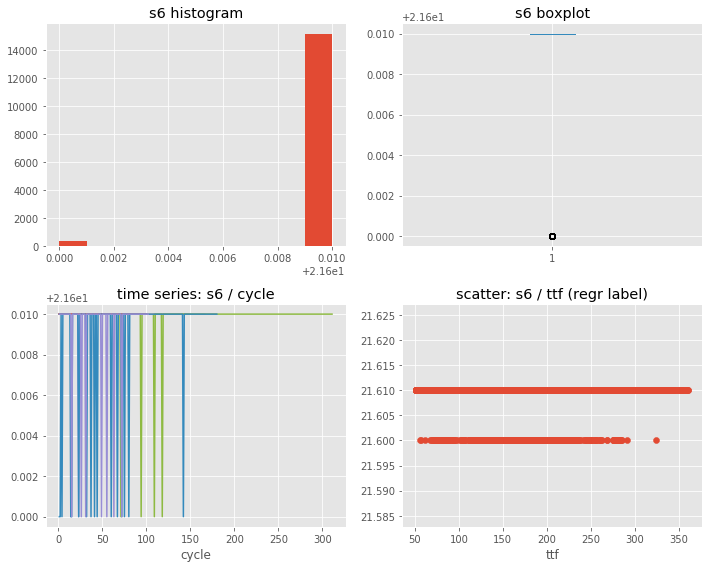

In [124]:
explore_col("s6",10)

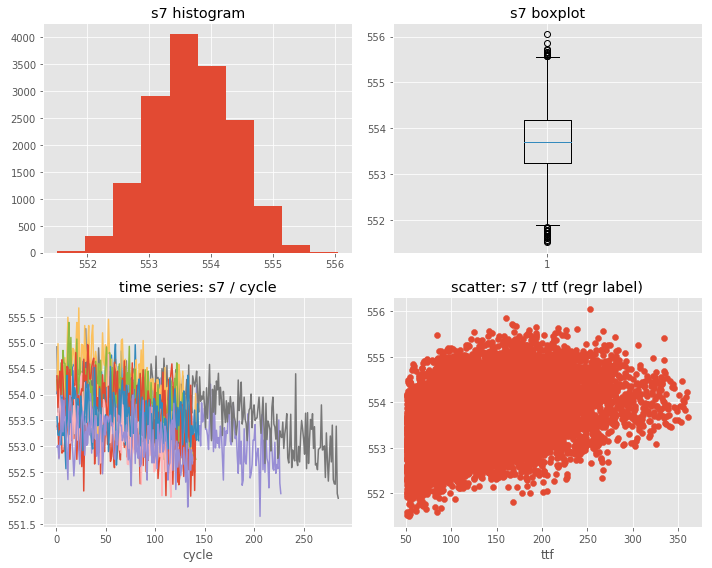

In [125]:
explore_col("s7",10)

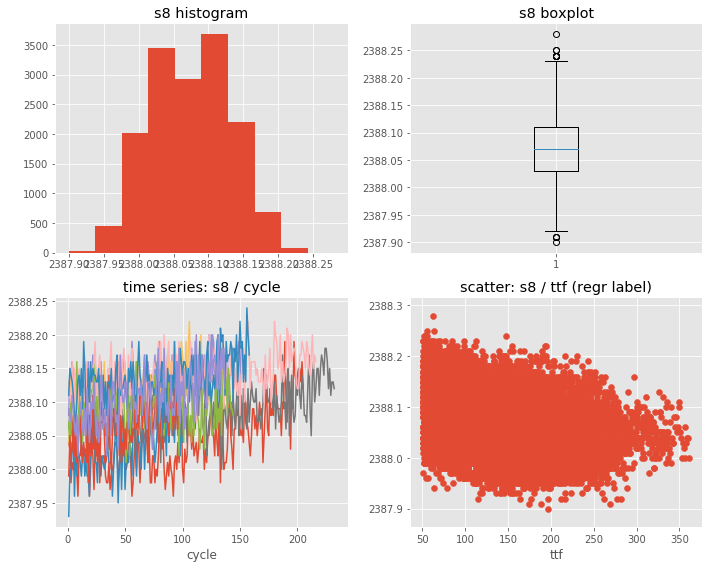

In [126]:
explore_col("s8",10)

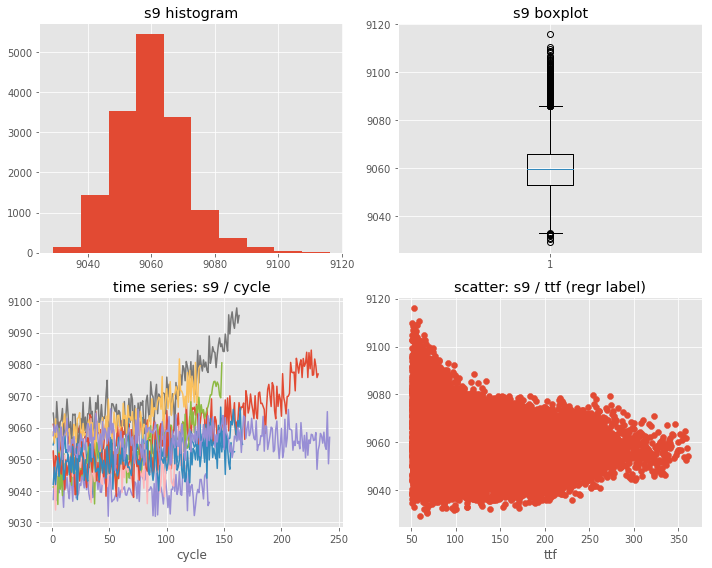

In [127]:
explore_col("s9",10)

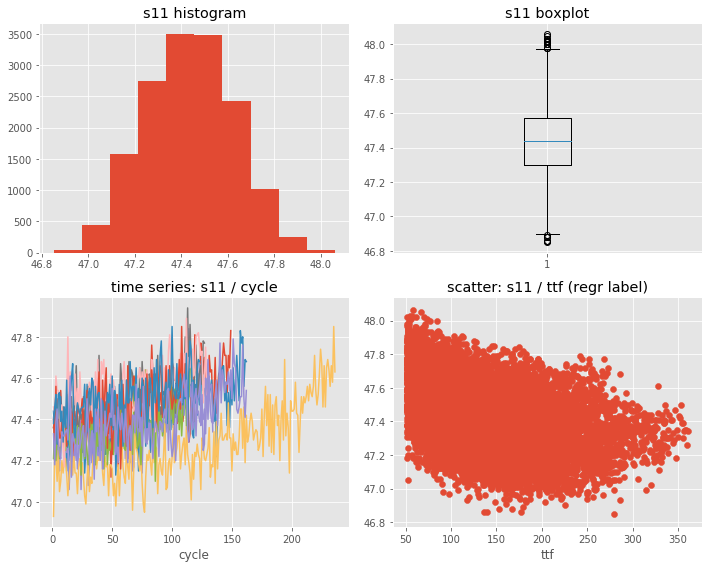

In [128]:
explore_col("s11",10)

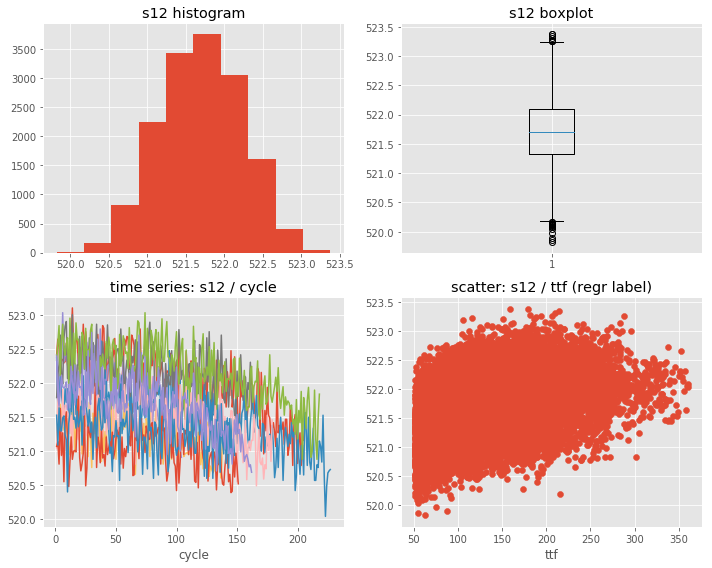

In [129]:
explore_col("s12",10)

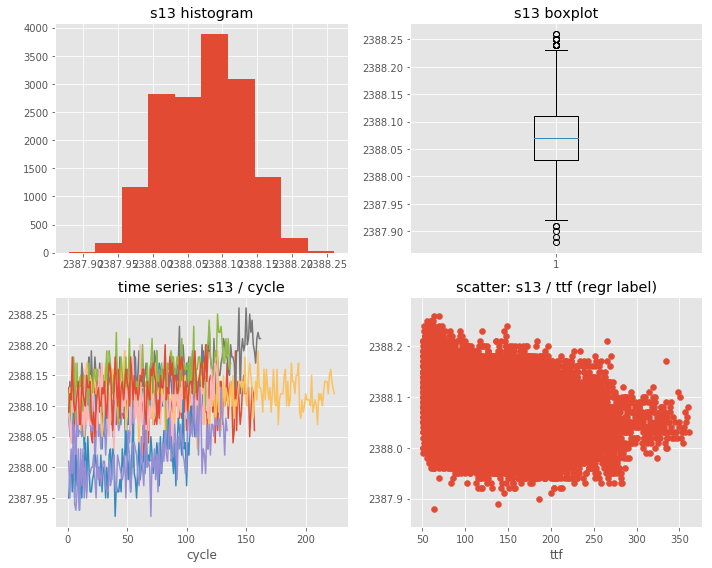

In [130]:
explore_col("s13",10)

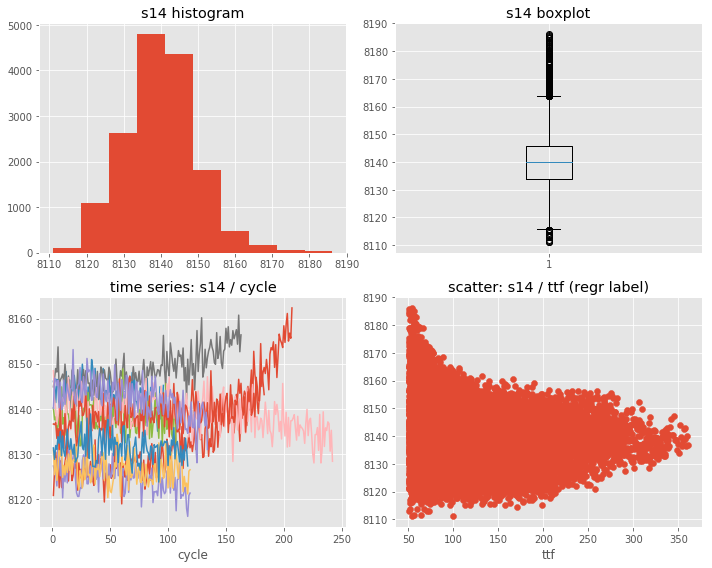

In [131]:
explore_col("s14",10)

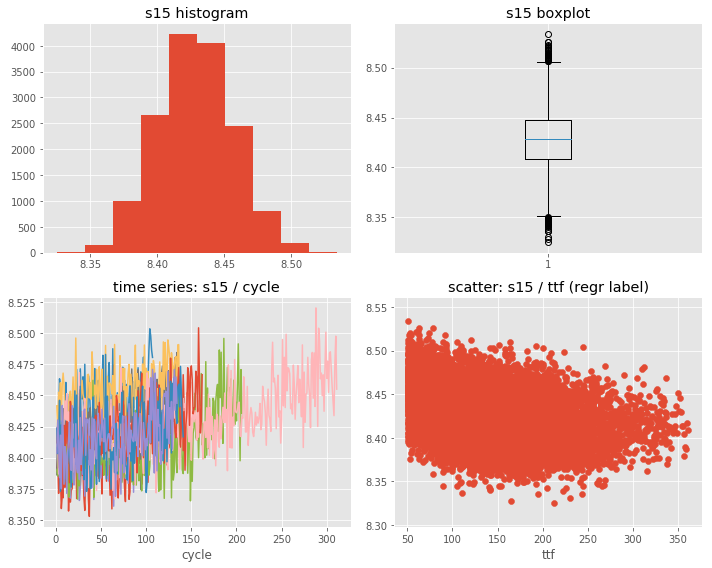

In [132]:
explore_col("s15",10)

# Load test data

In [133]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91


In [66]:
dt=df_test["cycle"]+df_test["ttf"]
dt.describe()

count    100.000000
mean     206.480000
std       44.041872
min      141.000000
25%      174.750000
50%      199.000000
75%      227.750000
max      341.000000
dtype: float64

In [67]:
df_test.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
count,100.000000,100.000000,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,...,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00000
mean,50.500000,130.960000,-0.000073,0.000022,100.0,5.186700e+02,642.768400,1591.824700,1410.548200,1.462000e+01,...,0.028907,3.100803,0.019207,0.0,0.889000,0.0,0.0,0.093899,0.057975,75.52000
std,29.011492,53.593479,0.002353,0.000306,0.0,1.142596e-12,0.444592,6.646293,8.626344,2.856489e-14,...,0.010837,1.027647,0.008033,0.0,0.307613,0.0,0.0,0.035885,0.020325,41.76497
min,1.000000,31.000000,-0.005900,-0.000500,100.0,5.186700e+02,641.750000,1576.930000,1389.330000,1.462000e+01,...,0.008367,0.622953,0.004287,0.0,0.000000,0.0,0.0,0.015166,0.018966,7.00000
25%,25.750000,88.750000,-0.001650,-0.000300,100.0,5.186700e+02,642.490000,1587.007500,1403.912500,1.462000e+01,...,0.020736,2.290447,0.013697,0.0,0.707107,0.0,0.0,0.070107,0.042731,32.75000
50%,50.500000,133.500000,-0.000250,0.000100,100.0,5.186700e+02,642.775000,1591.365000,1410.300000,1.462000e+01,...,0.028810,3.184937,0.018009,0.0,0.836660,0.0,0.0,0.088544,0.055796,86.00000
75%,75.250000,164.250000,0.001300,0.000300,100.0,5.186700e+02,643.025000,1597.280000,1416.922500,1.462000e+01,...,0.037014,3.793166,0.023288,0.0,1.140175,0.0,0.0,0.114105,0.072792,112.25000
max,100.000000,303.000000,0.007600,0.000500,100.0,5.186700e+02,644.030000,1607.550000,1428.420000,1.462000e+01,...,0.062048,5.584839,0.049270,0.0,1.483240,0.0,0.0,0.187216,0.115700,145.00000


In [68]:
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.028810,3.302941,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.008367,1.370062,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.029665,2.979090,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.027019,0.622953,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.023022,1.923609,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91


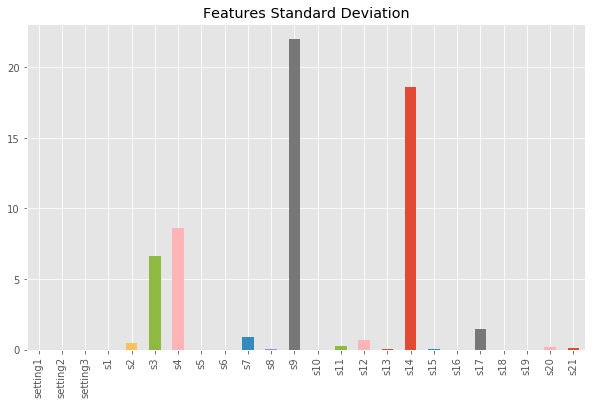

In [69]:
df_test[featurs].std().plot(kind='bar', figsize=(10,6), title="Features Standard Deviation")

# Regression Modelling:

In [70]:
#Prepare data for regression model

# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']
features_impor = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21','sd2', 'sd3', 'sd4', 'sd6', 'sd7', 'sd8', 'sd9', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd17','sd20', 'sd21']
features = features_impor

X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']


Create a helper function to calculate regression metrics

In [71]:
import math 
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
     # view predictions vs actual
    pred_dict = {
                'Actual' : actual,
                'Prediction' : predicted
            }
    # pred = pd.DataFrame.from_dict(pred_dict)
    pred = pd.DataFrame.from_dict(pred_dict)
    error = pd.DataFrame(pred.Prediction-pred.Actual)
    error.columns = ['residuals']
    df_error=pd.concat([pred,error],axis=1)
    # calculated cost function
    result=0
    evaluation=[]
    for i in range(len(df_error)):
        if df_error['residuals'][i]<0:
            calculated= math.exp((df_error['residuals'][i])/-13)-1
            evaluation.append(calculated)
            result+=calculated       
        else:
            calculated= math.exp((df_error['residuals'][i])/10)-1
            evaluation.append(calculated)
            result+=calculated   
    Total_cost=result/len(df_error) 
    
    MAPE= np.mean(np.abs((actual - predicted) / actual)) * 100
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted),
                        'Mean absolute percentage error': MAPE,
                        'Total cost':Total_cost
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [72]:
def view_predictions_actual(model, actual, predicted):
    # view predictions vs actual
    pred_dict = {
                'Actual' : actual,
                'Prediction' : predicted
            }
    # pred = pd.DataFrame.from_dict(pred_dict)
    pred_actual = pd.DataFrame.from_dict(pred_dict).T
    return pred_actual


Create a helper function to plot the regression residuals

In [73]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()
    

Using the above functions let us model and evaluate some regression algorithms

## HMM

In [ ]:
#try linear regression

linReg = linear_model.LinearRegression()
linRegGoodState.fit(X_train, y_train)

y_test_predict = linRegGoodState.predict(X_test)
y_train_predict = linRegGoodState.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

## Linear regression

In [74]:
#try linear regression

linRegGoodState = linear_model.LinearRegression()
linRegGoodState.fit(X_train, y_train)

y_test_predict = linRegGoodState.predict(X_test)
y_train_predict = linRegGoodState.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics


R^2 training: 0.582, R^2 test: 0.406


,Linear Regression
Root Mean Squared Error,32.020301
Mean Absolute Error,25.590937
R^2,0.406267
Explained Variance,0.663014
Mean absolute percentage error,55.281868
Total cost,128.652307


In [75]:
linreg_view_predictions_actual= view_predictions_actual('Linear Regression', y_test, y_test_predict)
linreg_view_predictions_actual

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.00000,59.000000,117.000000,20.000000
Prediction,158.070452,125.568762,82.653575,94.161683,112.517993,124.241912,128.152438,99.011995,116.698514,115.530093,...,51.702866,33.856524,63.571536,67.697255,147.267379,165.782926,105.69053,102.863713,164.367539,1.357479


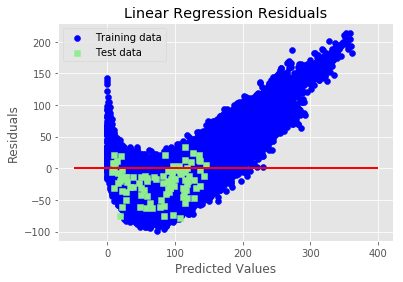

In [76]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

## Lasso regression

In [77]:
#try LASSO

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.582, R^2 test: 0.407


,LASSO
Root Mean Squared Error,32.004729
Mean Absolute Error,25.588765
R^2,0.406844
Explained Variance,0.664194
Mean absolute percentage error,55.141270
Total cost,125.960830


In [78]:
lasso_view_predictions_actual= view_predictions_actual('LASSO', y_test, y_test_predict)
lasso_view_predictions_actual

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Prediction,158.372131,125.528873,82.793459,94.384584,112.621925,124.331751,128.462601,99.025108,116.571482,115.983935,...,51.690542,33.361649,63.673974,68.008556,145.532332,166.323946,105.774794,102.883795,164.748597,1.400283


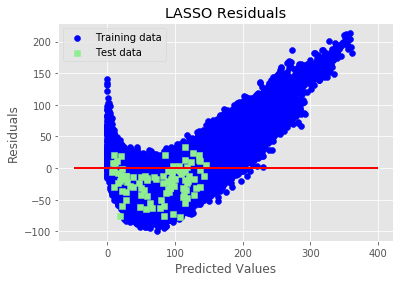

In [79]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

## Ridge Regression

In [80]:
#try ridge

rdg = linear_model.Ridge(alpha = 0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.582, R^2 test: 0.407


,Ridge Regression
Root Mean Squared Error,32.013057
Mean Absolute Error,25.586765
R^2,0.406536
Explained Variance,0.663316
Mean absolute percentage error,55.250759
Total cost,127.872667


In [81]:
ridge_view_predictions_actual= view_predictions_actual('Ridge Regression', y_test, y_test_predict)
ridge_view_predictions_actual

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.00000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Prediction,158.144352,125.583004,82.663167,94.171651,112.535799,124.266901,128.228403,99.030681,116.720979,115.578422,...,51.676397,33.78715,63.575511,67.708519,146.943136,165.896008,105.731454,102.896948,164.458194,1.389399


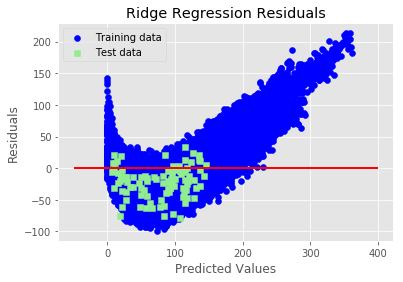

In [82]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

## Polynomial Regression

In [83]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.644, R^2 test: 0.432


,Polynomial Regression
Root Mean Squared Error,31.327251
Mean Absolute Error,24.222614
R^2,0.431690
Explained Variance,0.637895
Mean absolute percentage error,48.108123
Total cost,166.876363


In [84]:
Polynomial_view_predictions_actual= view_predictions_actual('Polynomial Regression', y_test, y_test_predict)
Polynomial_view_predictions_actual

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.000000,91.00000,93.000000,91.000000,95.000000,111.000000,96.00000,...,38.000000,20.00000,85.00000,55.00000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Prediction,169.814821,146.811421,86.553695,97.117728,129.70805,114.360639,117.095079,104.274501,114.714646,114.17347,...,38.801388,40.00959,45.89858,81.10415,140.128747,173.190246,93.163499,95.560219,153.476331,0.011829


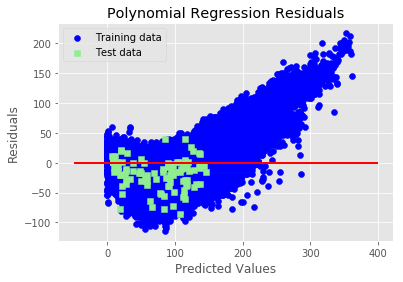

In [85]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

## Decision Tree regressor

In [86]:
#try Decision Tree regressor

#dtrg = DecisionTreeRegressor(max_depth=8, max_features=5, random_state=123) # selected features
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)

R^2 training: 0.626, R^2 test: 0.408


In [87]:
DecisionTree_view_predictions_actual= view_predictions_actual('Decision Tree Regression', y_test, y_test_predict)
DecisionTree_view_predictions_actual

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.000000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.00
Prediction,161.220994,131.677632,47.828947,137.779592,128.150407,121.482014,137.095023,103.837079,128.150407,137.779592,...,17.850394,31.643678,38.428571,55.628931,153.578416,152.920204,65.130435,95.777027,156.464853,19.84


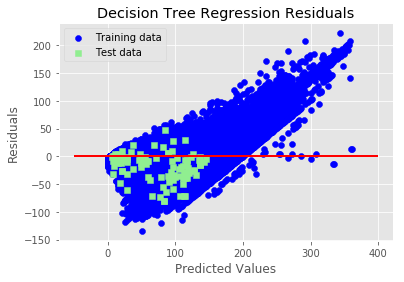

In [88]:
plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)

## Random Forest

In [89]:
#try Random Forest

#rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=4, n_jobs=-1, random_state=1) # selected features
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1) # original features
# rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.580, R^2 test: 0.507


,Random Forest Regression
Root Mean Squared Error,29.180076
Mean Absolute Error,23.990451
R^2,0.506925
Explained Variance,0.756677
Mean absolute percentage error,55.431565
Total cost,55.208982


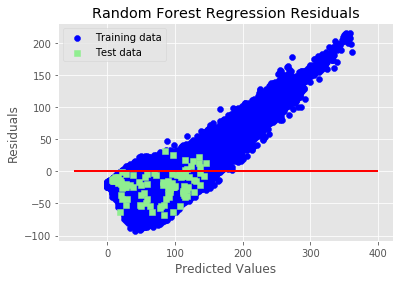

In [90]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

In [91]:
RandomForest_view= view_predictions_actual('Random Forest Regression', y_test, y_test_predict)
RandomForest_view

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.00000,91.000000,93.000000,91.000000,95.000000,111.000000,96.000000,...,38.000000,20.000000,85.000000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.000000
Prediction,146.143604,122.163456,71.259432,98.14482,112.182761,125.176767,130.924944,99.777809,118.344349,120.875094,...,44.065449,36.430046,53.114266,63.649696,141.433646,157.721718,103.201762,101.482951,154.661516,39.352827


## Compare all regression models tested

In [92]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, dtrg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Ridge Regression,Decision Tree Regression,Polynomial Regression,Random Forest Regression
Root Mean Squared Error,32.020301,32.004729,32.013057,31.961553,31.327251,29.180076
Mean Absolute Error,25.590937,25.588765,25.586765,24.113687,24.222614,23.990451
R^2,0.406267,0.406844,0.406536,0.408444,0.431690,0.506925
Explained Variance,0.663014,0.664194,0.663316,0.634262,0.637895,0.756677
Mean absolute percentage error,55.281868,55.141270,55.250759,42.988096,48.108123,55.431565
Total cost,128.652307,125.960830,127.872667,161.924930,166.876363,55.208982


In accordance with our analysis in the data exploratory phase, non-linear regression models like Polynomial and Random Forest performed better than linear models like Linear regression, LASSO and Ridge regression. Random Forest clearly outperformed other models scoring RMSE of 29.18 cycles, i.e. the model predicts TTF within average error range of ±29.18 cycles.